# CCE3206 - Practical 2 - IIR system
# Graham Pellegrini 0352804L

## Tasks:
### 1. Create IIR Filter


In [256]:
import numpy as np

def filter(x):
    # set y to have the same length and type as x
    y = np.zeros_like(x)
   
    # initialize w(n-1) to 0
    w_prev = 0
   
    # iterate over all input samples
    for n, x_n in enumerate(x):
        # calculate the output of the filter
        w = x_n + (0.6 * w_prev)
        y[n] = (0.2 * w) + (0.2 * w_prev)
        
        # update w_prev for the next iteration
        w_prev = w
    
    return y

### 2.

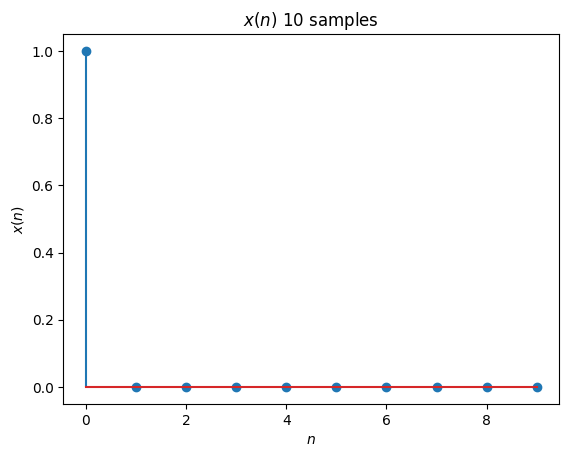

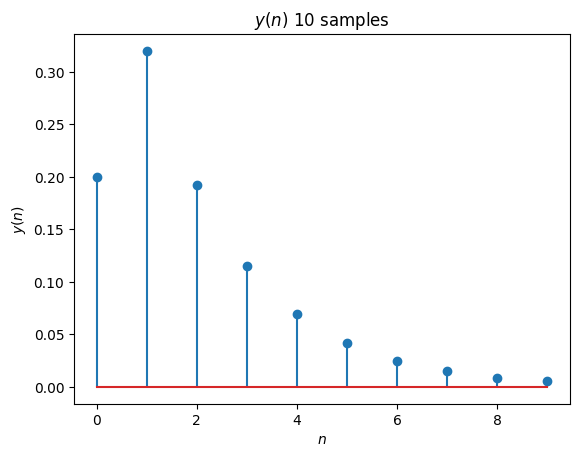

In [257]:
import matplotlib.pyplot as plt
# (a) Generate an input sequence x(n) = δ(n) for a length of 10 samples
x = np.zeros(10)
x[0] = 1  # delta function

# (b) Produce an output sequence y(n) by passing the input sequence to the filter
y = filter(x)

# Plot the input sequence
fig, ax = plt.subplots()
n = np.arange(len(x))
ax.stem(n, x)
ax.set_xlabel('$n$')
ax.set_ylabel('$x(n)$')
plt.title('$x(n)$ 10 samples')
plt.show()

# (c) Plot the output
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n, y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.title('$y(n)$ 10 samples')
plt.show()

### 3

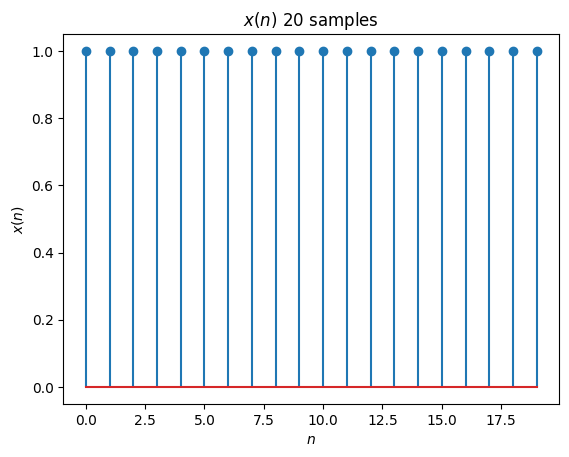

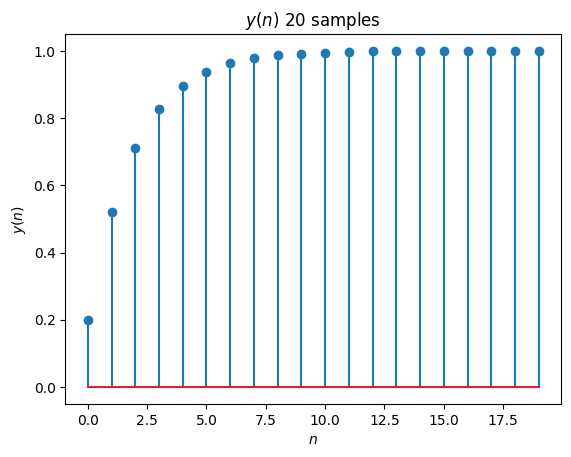

In [258]:

# Generate an input sequence x(n) = U(n) for a length of 20 samples
x = np.ones(20)  # unit step function

# Produce an output sequence y(n) by passing the input sequence to the filter
y = filter(x)

# Plot the input sequence
fig, ax = plt.subplots()
n = np.arange(len(x))
ax.stem(n, x)
ax.set_xlabel('$n$')
ax.set_ylabel('$x(n)$')
plt.title('$x(n)$ 20 samples')
plt.show()

# Plot the output
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n, y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.title('$y(n)$ 20 samples')
plt.show()

### 4.

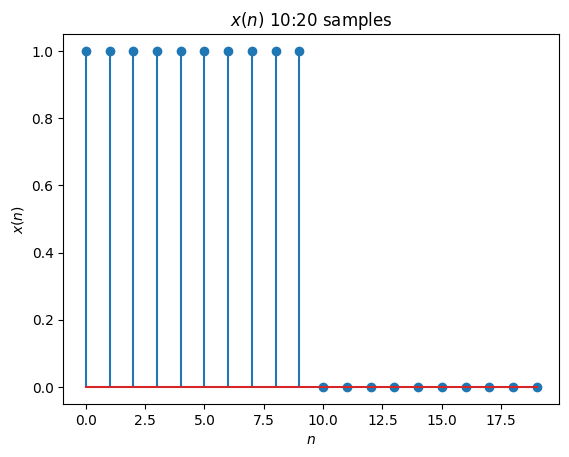

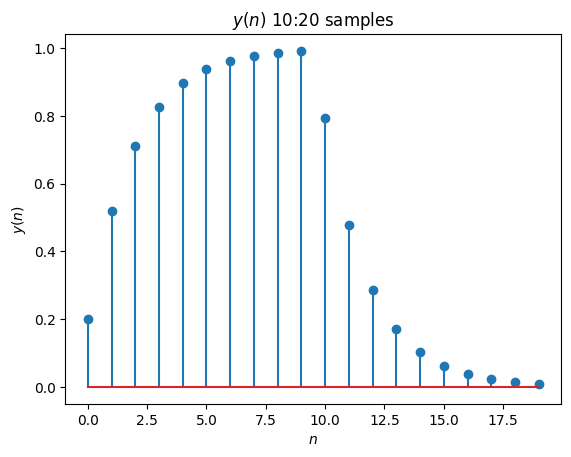

In [259]:

# Generate an input sequence x(n) = U(n) - U(n - 10) for a length of 20 samples
x = np.ones(20)  # unit step function
x[10:] = 0  # subtracting U(n - 10)

# Produce an output sequence y(n) by passing the input sequence to the filter
y = filter(x)

# Plot the input sequence
fig, ax = plt.subplots()
n = np.arange(len(x))
ax.stem(n, x)
ax.set_xlabel('$n$')
ax.set_ylabel('$x(n)$')
plt.title('$x(n)$ 10:20 samples')
plt.show()

# Plot the output
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n, y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.title('$y(n)$ 10:20 samples')
plt.show()

### 5.

44100


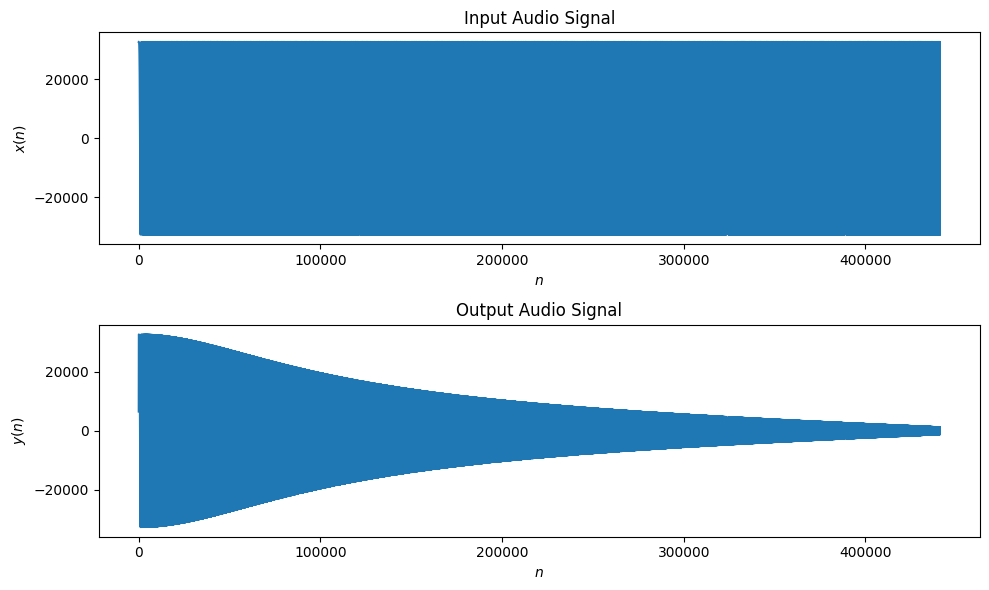

In [260]:
from scipy.io import wavfile
[fs, x] = wavfile.read('files/tones.wav')
print(fs)

# (b) Filter the audio using the filter from Task 1
y = filter(x)

# (c) Save the output
wavfile.write('output_tones.wav', fs, y.astype(np.int16))

# (d) Plot the input and output waveforms for comparison
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

n = np.arange(len(x))
ax[0].plot(n, x)
ax[0].set_title('Input Audio Signal')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$x(n)$')

n = np.arange(len(y))
ax[1].plot(n, y)
ax[1].set_title('Output Audio Signal')
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('$y(n)$')

plt.tight_layout()
plt.show()

### 6.

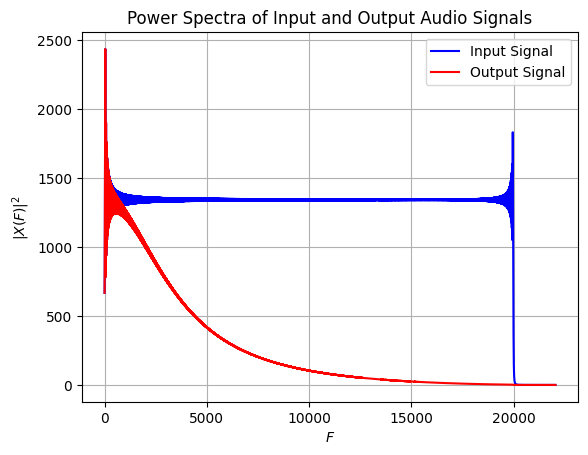

In [261]:
from scipy.fft import fft, fftfreq

# Compute the FFT and power spectrum of the input signal
X = fft(x) / len(x)
X = X[:len(X) // 2]
Xp = np.abs(X) ** 2
F = fftfreq(len(x), 1 / fs)
F = F[:len(F) // 2]

# Compute the FFT and power spectrum of the output signal
Y = fft(y) / len(y)
Y = Y[:len(Y) // 2]
Yp = np.abs(Y) ** 2

# Plot the power spectra of both signals
fig, ax = plt.subplots()
ax.plot(F, Xp, label='Input Signal', color='blue')
ax.plot(F, Yp, label='Output Signal', color='red')
ax.set_xlabel('$F$')
ax.set_ylabel('$|X(F)|^2$')
ax.grid(True)
ax.legend()
plt.title('Power Spectra of Input and Output Audio Signals')
plt.show()

### 7.

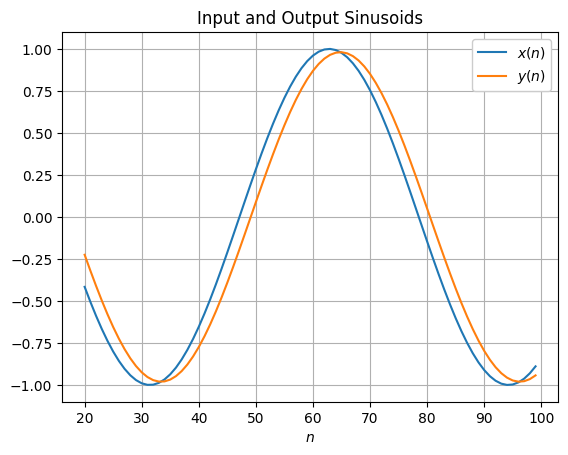

Gain of the filter: 0.9805059752083243
Phase shift of the filter: 0.2 rad


In [262]:

# Generate a sinusoid x(n) = cos(ω0 * n) with ω0 = 0.1 rad/sample
w0 = 0.1
L = 100  # Length of the sinusoid
n = np.arange(L)
x = np.cos(n * w0)

# Filter the sinusoid
y = filter(x)

# Remove the transient response from the output
y = y[20:]
# Remove the respective samples from the input and n sequences
x = x[20:]
n = n[20:]


# Plot the input and output on the same axis
fig, ax = plt.subplots()
ax.plot(n, x, label='$x(n)$')
ax.plot(n, y, label='$y(n)$')
ax.set_xlabel('$n$')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.title('Input and Output Sinusoids')
plt.show()

# Determine the gain of the filter
x_max = np.max(np.abs(x))
y_max = np.max(np.abs(y))

gain = y_max / x_max
print(f'Gain of the filter: {gain}')

# Function to find the zero crossings of a signal
def find_zc(signal):
    # Find the indices where the signal changes sign
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    # Return the indices
    return zero_crossings

# Find the zero crossings of the input and output signals
zc_x = find_zc(x)
zc_y = find_zc(y)

# Calculate the delay in samples
delay_samples = zc_y[0] - zc_x[0]

# Convert the delay to radians by multiplying by the angular frequency
phase_shift = delay_samples * w0

print(f'Phase shift of the filter: {phase_shift} rad')



### 8.

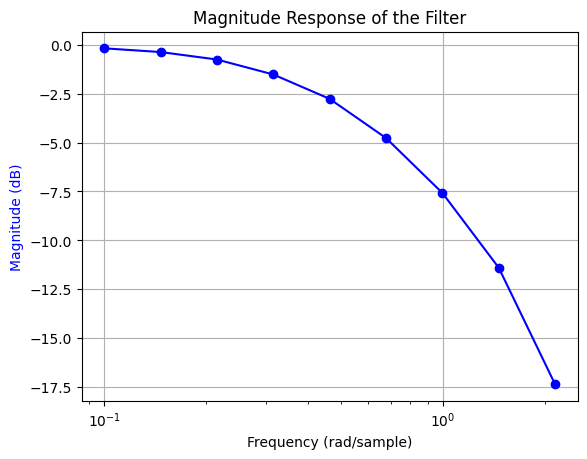

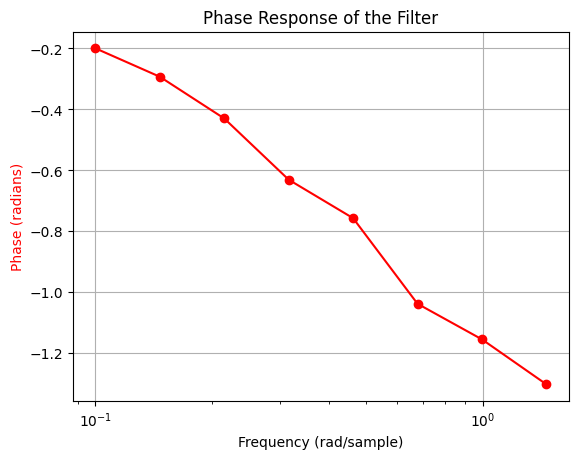

In [263]:
# Generating 10 logarithmically spaced frequencies for w0 in range [0.1 to π]
w = np.geomspace(0.1, np.pi, 10)
# Remove the last element to avoid π
w= w[:-1]
# We note that pi will give a magnitude of log(0) = -inf and a phase of 0 which will ruin our plots since we know their theoretical values

# Use the same length for all sinusoids
L = 100  
gains = []
phases = []

for w0 in w:
    n = np.arange(L)
    x = np.cos(n * w0)
    y = filter(x)

    # Remove the transient response from the output
    y = y[20:]
    # Remove the respective samples from the input and n sequences
    x = x[20:]
    n = n[20:]
    
    # Determine the gain of the filter
    x_max = np.max(np.abs(x))
    y_max = np.max(np.abs(y))
    gain = y_max / x_max
    
    # Determine the phase shift of the filter using zero crossings
    zc_x = find_zc(x)
    zc_y = find_zc(y)

    # Make sure the zero crossings have the same length to avoid missmatching 
    if len(zc_x) < len(zc_y):
        zc_y = zc_y[:len(zc_x)]
    elif len(zc_y) < len(zc_x):
        zc_x = zc_x[:len(zc_y)]
    
    if len(zc_x) > 0 and len(zc_y) > 0:
        # Calculate the delay in samples
        delay_samples = np.mean(zc_y - zc_x)
        
        # Convert the delay to radians
        phase_shift = -delay_samples * w0
        
        # Append the gain in dB format
        gains.append(20 * np.log10(gain))
        # Append the phase shift in radians
        phases.append(phase_shift)

# Plot the magnitude response
fig, ax1 = plt.subplots()
ax1.semilogx(w, gains, 'b-o')
ax1.set_xlabel('Frequency (rad/sample)')
ax1.set_ylabel('Magnitude (dB)', color='b')
ax1.grid(True)
plt.title('Magnitude Response of the Filter')
plt.show()

# Plot the phase response
fig, ax2 = plt.subplots()
ax2.semilogx(w[:-1], phases[:-1], 'r-o')
ax2.set_xlabel('Frequency (rad/sample)')
ax2.set_ylabel('Phase (radians)', color='r')
ax2.grid(True)
plt.title('Phase Response of the Filter')
plt.show()